#**Evaluation Metrics**

**Content Creator:** Mohitrajhu Lingan Kumaraian

**Learning Objectives:**


*   Understand how probablility thresholds affect ML model predicions
* Understand confusion matrices and ROC curves 



In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,fbeta_score, confusion_matrix,roc_curve,auc
import numpy as np
import matplotlib.pyplot as plt

##The Outcomes considered

Let y_true be the true labels of input data and y_score contain the outcome predicted by the classifier for the same input data.

In [ ]:
y_true = np.array([1,0,0,1,1,1,0,1,0,0,0,0,0,1,0,1,1,1])
y_score = np.array([0.8,0.3,0.4,0.7,0.9,0.65,0.21,0.55,0.1,0.16,0.37,0.22,0.25,0.49,0.45,0.7,0.75,0.99])


First, if we choose the threshold probability to be 0.5, then y_outcome will be as follows

In [ ]:
##Threshold probability
p_thresh = 0.5
y_outcome1 = y_score.copy()
y_outcome1[y_outcome1>p_thresh] = 1
y_outcome1[y_outcome1<=p_thresh] = 0

The cnfusion matrix for this example is as follows:

**Note:** The sklearn confusion matrix follows the normal convention as shown in the class slides: rows are the true outcome, columns are the predicted outcome

In [ ]:
confusion_matrix(y_true,y_outcome1)

array([[9, 0],
       [1, 8]])

As you can see from above, the outcomes are as follows:

*    True Positives (TP) = 9
*    False Positives (FP) = 0
*    False Negatives (FN) = 1
*    True Negatives (TN) = 8

The resulting accuracy, precision, recall and F1 score are:


In [ ]:
print("Accuracy: {}".format(accuracy_score(y_true,y_outcome1)))
print("Precision: {}".format(precision_score(y_true,y_outcome1)))
print("Recall: {}".format(recall_score(y_true,y_outcome1)))
print("F1: {}".format(fbeta_score(y_true,y_outcome1,1)))

Accuracy: 0.9444444444444444
Precision: 1.0
Recall: 0.8888888888888888
F1: 0.9411764705882353


Now, if we want to be more confident of our positive predictions,  the probability threshold can be raised to be 0.7. How do you expect accuracy, precision, recall and F1 to change?

What if you reduce the threshold to be 0.3?

What do you think the optimal value of p_threshold should be to maximize accuracy? 

In this case, there is a threshold value which can be used to perfectly classify the examples. But, this is not usually the case. As shown in the slides, the probability values carry different meanings in different situations. Thus, the probability threshold needs to be selected based on the true loss function of your application.

##ROC curve

For the above example, the ROC curve is:

 The area under is curve is 1.0


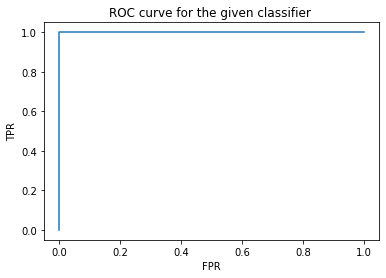

In [ ]:
fpr,tpr,_=roc_curve(y_true,y_score,pos_label=1)
plt.plot(fpr,tpr)
plt.title("ROC curve for the given classifier ")
plt.ylabel("TPR")
plt.xlabel("FPR")
print(" The area under is curve is {}".format(auc(fpr,tpr)))

The above classifier is the best possible classifier.  Let's see how the classification score would be for a random classifier, one that classifies every example into positive or negative with a constant probability of 0.5. How do you think the graph will look and what do you think the area under the curve would be? 

Run the code block below to find the answer. Did you get what you observed?


 The area under is curve is 0.5


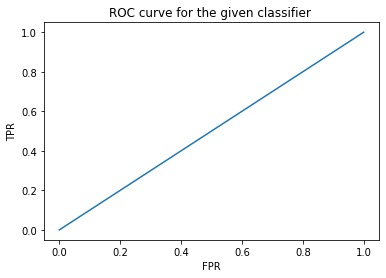

In [ ]:
## output of randon classifier
y_randomscore = np.array([0.5]*18)
fpr,tpr,_=roc_curve(y_true,y_randomscore,pos_label=1)
plt.plot(fpr,tpr)
plt.title("ROC curve for the given classifier ")
plt.ylabel("TPR")
plt.xlabel("FPR")
print(" The area under is curve is {}".format(auc(fpr,tpr)))

Do you think we can have a classifier whose curve is completely below the straight line above? What do you think of such classifier?

Do you think a curve similar to the auc=1 will be formed even for a classifier which classifies all the positive examples with a probability greater than 0.5? When do you get an ROC curve with an AUC between 0.5 and 1?

Experiment with this notebook to see how the ROC curve varies in different situations.

 The area under is curve is 0.775


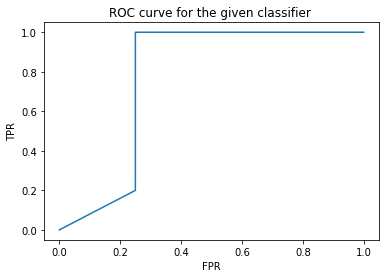

In [ ]:
y_true = [1,0,1,1,0,1,0,0,1]
y_score2 = [0.6,0.6,0.55,0.57,0.45,0.51,0.29,0.40,0.51]
fpr,tpr,_ = roc_curve(y_true,y_score2,pos_label=1)
plt.plot(fpr,tpr)
plt.title("ROC curve for the given classifier ")
plt.ylabel("TPR")
plt.xlabel("FPR")
print(" The area under is curve is {}".format(auc(fpr,tpr)))